# **Bike Sharing (Capital Bikeshare)**

****

[Dataset Bike Sharing](https://drive.google.com/file/d/1lSbp2GTSgE8jwvA2K8rlLRZIUTWNNfXe/view) 

### **Analytic Approach**

kita akan melakukan analisa terhadap data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu kondisi dengan yang lainnya, serta bagaimana tiap fitur tersebut mempengaruhi jumlah unit sepeda yang perlu tersedia. Selanjutnya, kita akan membangun suatu model regresi yang akan membantu dalam menentukan jumlah unit sepeda yang perlu disediakan oleh Capital Bikeshare, yang mana akan berguna untuk menjaga efisiensi *operational cost*.

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

***

## **Business Problem Understanding**

### **Context**

***Capital Bikeshare*** adalah suatu sistem penyewaan sepeda yang beroperasi di Amerika Serikat. Inovasi terbaru dalam rental sepeda ini menghadirkan sistem peminjaman sepeda yang mengotomatisasi seluruh proses keanggotaan, penyewaan, dan pengembalian. 

Dengan menggunakan platform ini, pengguna dapat dengan mudah meminjam sepeda dari satu tempat dan mengembalikannya di tempat lain. Saat ini, lebih dari 500 *bike-sharing* program telah diperkenalkan di berbagai belahan dunia, menyediakan lebih dari 500.000 sepeda bagi publik pengguna. Capital Bikeshare adalah sebuah sistem sepeda yang memiliki lebih dari 600 titik pengambilan dan sekitar 5.000 sepeda di seluruh kawasan Washington. Anda dapat menemukan informasi lebih lanjut mengenai Capital Bikeshare di [Bike Sharing Data](https://capitalbikeshare.com/). 

Pada saat ini, minat terhadap sistem ini telah meningkat signifikan karena memiliki peran yang sangat penting dalam mengatasi masalah lalu lintas, lingkungan, dan kesehatan. Meskipun sistem peminjaman sepeda di dunia nyata menarik, minat penelitian terfokus pada karakteristik data yang dihasilkan oleh sistem ini. Sistem ini mencatat dengan jelas durasi perjalanan, posisi keberangkatan, dan posisi kedatangan yang berbeda dengan sarana transportasi lain seperti bus atau *subway*. 

Fitur ini mengubah sistem peminjaman sepeda menjadi suatu jaringan sensor virtual yang dapat digunakan untuk mengamati pergerakan dalam kota. Dengan demikian, diharapkan bahwa banyak peristiwa signifikan di dalam kota dapat terdeteksi melalui pemantauan data ini.

### **Problem Statement**

Salah satu dari banyak tantangan dalam sistem peminjaman ini ialah **untuk menyediakan jumlah unit sepeda yang cukup di setiap kondisi dan situasi. Jika tidak, maka kita bisa gagal dalam memenuhi tuntutan dari pengguna sistem peminjaman sepeda tersebut dan bahkan bisa berujung kepada hilangnya kepercayaan pelanggan**. Namun apabila jumlah ketersediaan sepeda terlalu banyak, hal itu bisa menyebabkan banyaknya unit sepeda yang tidak terpakai, dalam kata lain, tidak efisien. Dimana hal tersebut bisa berimbas kepada membengkaknya biaya manajemen, logistik, serta perawatan untuk tiap unit sepeda. Seperti yang dilansir [Wikipedia](https://en.wikipedia.org/wiki/Capital_Bikeshare), setiap satu unit sepeda berharga $1000 dan biaya operasi tahunan setiap sepedanya adalah $1860.

### **Goals**

Berdasarkan permasalahan tersebut, Capital Bikeshare tentu perlu memiliki 'tool' yang baik guna memprediksi serta membantu tiap *stakeholder* yang terkait (baik klien maupun Capital Bikeshare itu sendiri) untuk dapat **menentukan jumlah unit sepeda yang tersedia dengan tepat di setiap kondisi dan situasi**. 

Adanya perbedaan situasi dan kondisi seperti cuaca, musim, kelembaban, suhu, dapat menambah keakuratan prediksi jumlah unit sepeda yang perlu disediakan. Dimana hal tersebut tidak hanya mendatangkan profit namun juga menjaga efisiensi *operational cost* dari sisi Capital Bikeshare dan jika dari sisi pengguna (klien) tentunya hal tersebut sangat membantu dalam memenuhi tuntutan kebutuhan pelanggan.

### **Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah MAE, MAPE, dan R-squared. Dimana MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai MAE dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi jumlah unit sepeda dengan limitasi fitur yang digunakan.  Selain itu, kita juga akan menggunakan nilai R-squared jika model yang nanti terpilih sebagai final model adalah model linear. 

Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data, seberapa besar pengaruh variabel independen terhadap variabel dependen. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

## **Data Understanding**

- Dataset merupakan data peminjaman sepeda di sistem ***Capital Bikeshare*** dalam rentang tahun 2011-2012.
- Setiap baris data merepresentasikan informasi terkait waktu peminjaman, cuaca, dan musim yang sesuai.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object | Date |
| hum | Float | Normalized humidity (the values are divided to 100)|
| weathersit | Integer | 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br> 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br> 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br> 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| holiday | Integer | 0: Not holiday<br> 1: Holiday |
| season | Integer | 1: Winter<br> 2: Spring<br> 3: Summer<br> 4: Fall |
| atemp | Float | "Feels like" temperature in Celsius |
| temp | Float | Normalized temperature in Celsius |
| hr | Integer | Hour (0 to 23) |
| casual | Integer | Count of casual users |
| registered | Integer | Count of registered users |
| cnt | Integer | Count of total rental bikes including both casual and registered users|

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### **Load Dataset**

In [2]:
# Load dataset
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Menyesuaikan beberapa nama kolom dan value untuk memudahkan keterbacaan data.
- Mengubah tipe data feature agar sesuai dengan nilai yang dimiliki.
- Mengecek missing value dan data duplikat.
- Drop feature yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Mengecek korelasi antar data.
- Mengecek outlier pada data numerik.

In [3]:
# Membuat duplikat Dataframe
df_model = df.copy()

In [4]:
df_model.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


### **Penyesuaian Nama Kolom dan Value**

In [5]:
# Mengurutkan dataset berdasarkan Tanggal dan Jam

df_model = df_model.sort_values(['dteday', 'hr']).reset_index()
df_model.drop('index', axis=1, inplace=True)
df_model

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-01-01,0.81,1,0,1,0.2879,0.24,0,3,13,16
1,2011-01-01,0.80,1,0,1,0.2727,0.22,1,8,32,40
2,2011-01-01,0.80,1,0,1,0.2727,0.22,2,5,27,32
3,2011-01-01,0.75,1,0,1,0.2879,0.24,3,3,10,13
4,2011-01-01,0.75,1,0,1,0.2879,0.24,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-12-31,0.45,2,0,1,0.2727,0.28,14,62,185,247
12161,2012-12-31,0.48,2,0,1,0.2576,0.26,16,30,184,214
12162,2012-12-31,0.48,2,0,1,0.2879,0.26,17,14,150,164
12163,2012-12-31,0.60,2,0,1,0.2576,0.26,19,11,108,119


In [6]:
# Mengubah value kolom 'season' dan 'weathersit' dari numerik menjadi penamaan kategori yang sesuai

df_model['season'] = df_model['season'].replace({1:'winter', 2:'spring', 3:'summer', 4:'fall'})
df_model['weathersit'] = df_model['weathersit'].replace({1:'clear', 2:'cloudy', 3:'Light snow/Light rain', 4:'Heavy rain/Snow'})
df_model

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-01-01,0.81,clear,0,winter,0.2879,0.24,0,3,13,16
1,2011-01-01,0.80,clear,0,winter,0.2727,0.22,1,8,32,40
2,2011-01-01,0.80,clear,0,winter,0.2727,0.22,2,5,27,32
3,2011-01-01,0.75,clear,0,winter,0.2879,0.24,3,3,10,13
4,2011-01-01,0.75,clear,0,winter,0.2879,0.24,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-12-31,0.45,cloudy,0,winter,0.2727,0.28,14,62,185,247
12161,2012-12-31,0.48,cloudy,0,winter,0.2576,0.26,16,30,184,214
12162,2012-12-31,0.48,cloudy,0,winter,0.2879,0.26,17,14,150,164
12163,2012-12-31,0.60,cloudy,0,winter,0.2576,0.26,19,11,108,119


In [7]:
# Mengubah beberapa nama kolom

df_model = df_model.rename(columns={'weathersit':'weather',
                       'dteday':'date',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})
df_model.head()

,date,humidity,weather,holiday,season,atemp,temp,hour,casual,registered,count
0,2011-01-01,0.81,clear,0,winter,0.2879,0.24,0,3,13,16
1,2011-01-01,0.80,clear,0,winter,0.2727,0.22,1,8,32,40
2,2011-01-01,0.80,clear,0,winter,0.2727,0.22,2,5,27,32
3,2011-01-01,0.75,clear,0,winter,0.2879,0.24,3,3,10,13
4,2011-01-01,0.75,clear,0,winter,0.2879,0.24,4,0,1,1


### **Mengubah Tipe Data dan Memisahkan Data Kolom 'date'**

In [8]:
# Mengubah tipe data 'date' menjadi DateTime

df_model['date'] = df_model['date'].astype('datetime64[ns]')

# Membuat kolom untuk memisahkan data Tahun, Bulan, dan Hari
df_model['year'] = df_model['date'].dt.year
df_model['month'] = df_model['date'].dt.month
df_model['day'] = df_model['date'].dt.day_name()


In [9]:
# Mengubah tipe data feature 'holiday', 'year', dan 'month' menjadi category

df_model['holiday'] = df_model['holiday'].astype('category')
df_model['year'] = df_model['year'].astype('category')
df_model['month'] = df_model['month'].astype('category')

In [10]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        12165 non-null  datetime64[ns]
 1   humidity    12165 non-null  float64       
 2   weather     12165 non-null  object        
 3   holiday     12165 non-null  category      
 4   season      12165 non-null  object        
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hour        12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  count       12165 non-null  int64         
 11  year        12165 non-null  category      
 12  month       12165 non-null  category      
 13  day         12165 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 1.1+ MB


### **Checking Missing Value dan Data Duplikat**

In [11]:
df_model.duplicated().any()

False

In [12]:
# Cek info lebih detail untuk setiap feature

listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)])

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,date,datetime64[ns],0,0.0,731,"[2012-01-11T00:00:00.000000000, 2012-01-01T00:..."
1,humidity,float64,0,0.0,89,"[0.91, 0.0]"
2,weather,object,0,0.0,4,"[cloudy, clear]"
3,holiday,category,0,0.0,2,"[0, 1]"
4,season,object,0,0.0,4,"[fall, spring]"
5,atemp,float64,0,0.0,65,"[0.3333, 0.8182]"
6,temp,float64,0,0.0,50,"[0.44, 0.4]"
7,hour,int64,0,0.0,24,"[8, 23]"
8,casual,int64,0,0.0,305,"[53, 171]"
9,registered,int64,0,0.0,742,"[362, 249]"


Dari info dataset di atas, diketahui tidak terdapat *missing value* pada dataset.

### **Drop Column (Feature Selection)**

Tentu perlu ada pertimbangan sebelum melakukan drop pada kolom atau feature. Sebagai pertimbangan, pada tahap awal ini kita bisa menggunakan domain knowledge untuk memutuskan kira-kira feature mana saja yang dirasa tidak memiliki relevansi.<br>
- Jika ditinjau berdasar domain knowledge, feature `Casual` dan `Registered` tidak memiliki relevansi dan kepentingan untuk analisis prediktif. Hal ini dikarenakan analisis prediktif ini lebih dititikberatkan kepada total jumlah unit sepeda yang disewa, terlepas dari status pengguna/penyewa.
- kolom `date` juga sudah tidak diperlukan karena nilai-nilai yang terdapat di dalamnya sudah diwakili dengan kolom `year`, `month`, dan `day`

In [13]:
# Drop kolom (feature) yang tidak diperlukan

df_model.drop(columns=['date', 'casual', 'registered'], inplace=True)

### **Data Correlation**

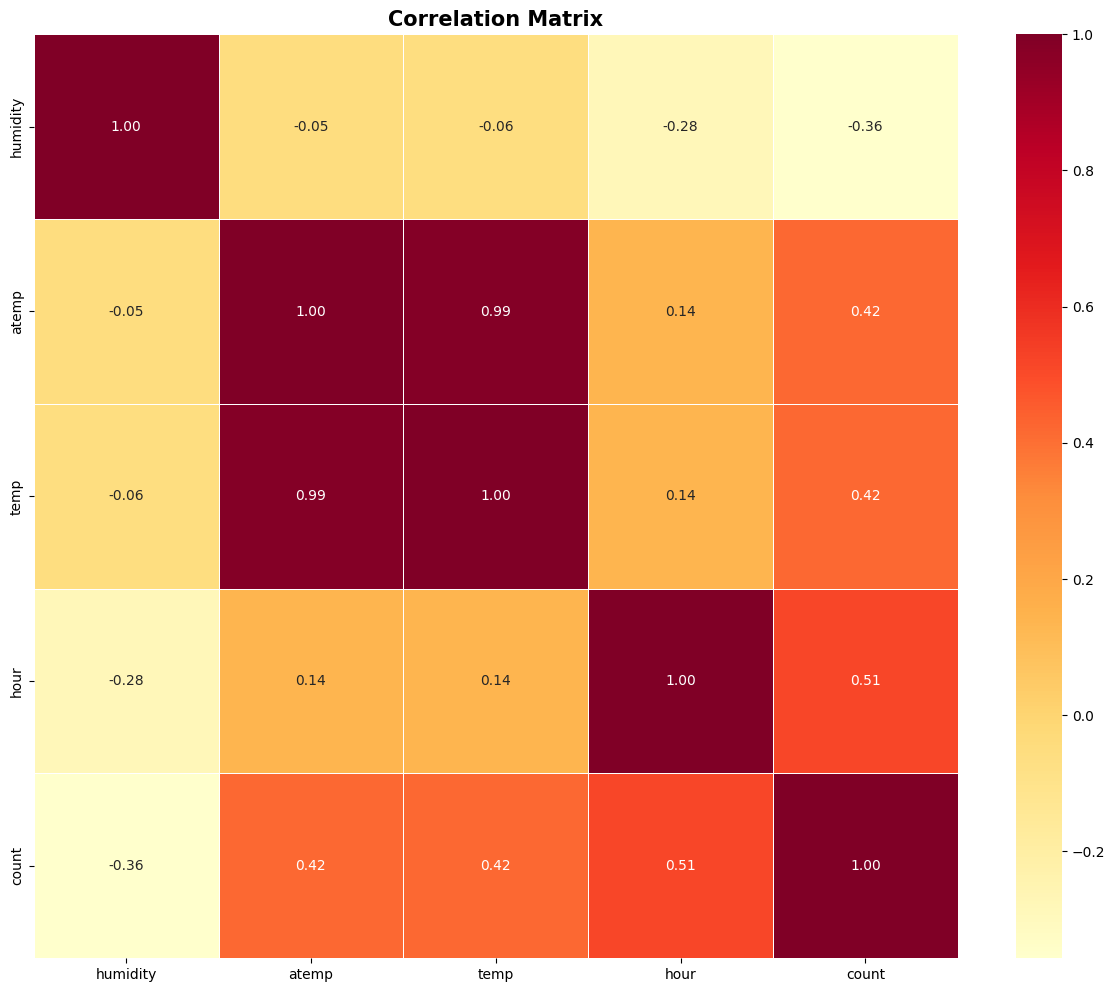

In [14]:
# Exclude non-numeric columns before calculating the correlation matrix

numeric_columns = df_model.select_dtypes(include=[np.number]).columns
corr = df_model[numeric_columns].corr(method='spearman')

# Plot the heatmap

plt.figure(figsize=(15, 12))
palette = sns.color_palette("YlOrRd", as_cmap=True)  # Menggunakan palet warna "YlOrRd"
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()


In [15]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   humidity  12165 non-null  float64 
 1   weather   12165 non-null  object  
 2   holiday   12165 non-null  category
 3   season    12165 non-null  object  
 4   atemp     12165 non-null  float64 
 5   temp      12165 non-null  float64 
 6   hour      12165 non-null  int64   
 7   count     12165 non-null  int64   
 8   year      12165 non-null  category
 9   month     12165 non-null  category
 10  day       12165 non-null  object  
dtypes: category(3), float64(3), int64(2), object(3)
memory usage: 796.6+ KB


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [17]:
calc_vif(df_model[['humidity', 'atemp', 'temp', 'hour', 'count']])

,variables,VIF
0,humidity,6.047913
1,atemp,338.317799
2,temp,306.108156
3,hour,3.849810
4,count,3.063218


Correlation matrix di atas menunjukkan bahwa ada beberapa feature yang memiliki korelasi (tidak cukup kuat) terhadap `count`. Korelasi positif paling tinggi dimiliki oleh feature `temp`, `atemp`, dan `hour`. Sedangkan untuk korelasi negatif paling tinggi dimiliki oleh feature `humidity`. Hal ini berarti semakin tingginya tingkat kelembapan (humidity), maka jumlah penyewaan sepeda semakin sedikit.

Namun yang perlu diperhatikan lebih jauh adalah korelasi antara kolom `temp` dan `atemp` yang sangat tinggi (0.99), hal ini mengindikasikan adanya multikolinearitas pada 2 kolom tersebut. Hal tersebut juga dapat dilihat skor VIF yang dihasilkan mencapai nilai ratusan (338 dan 306), sedangkan batas nilai VIF untuk tergolong multikolinearitas adalah di atas 4. Oleh karena itu kita akan drop salah satu yaitu `temp`. Hal ini didasarkan kepada domain knowledge, dimana `temp` berisikan nilai temperatur yang dibaca oleh termometer, sedangkan `atemp` berisikan nilai temperatur yang memperhitungkan suhu udara, kelembaban, dan kecepatan angin [(sumber MetOffice)](https://blog.metoffice.gov.uk/2012/02/15/what-is-feels-like-temperature/).

In [18]:
# Drop kolom 'atemp'

df_model = df_model.drop('temp', axis=1)

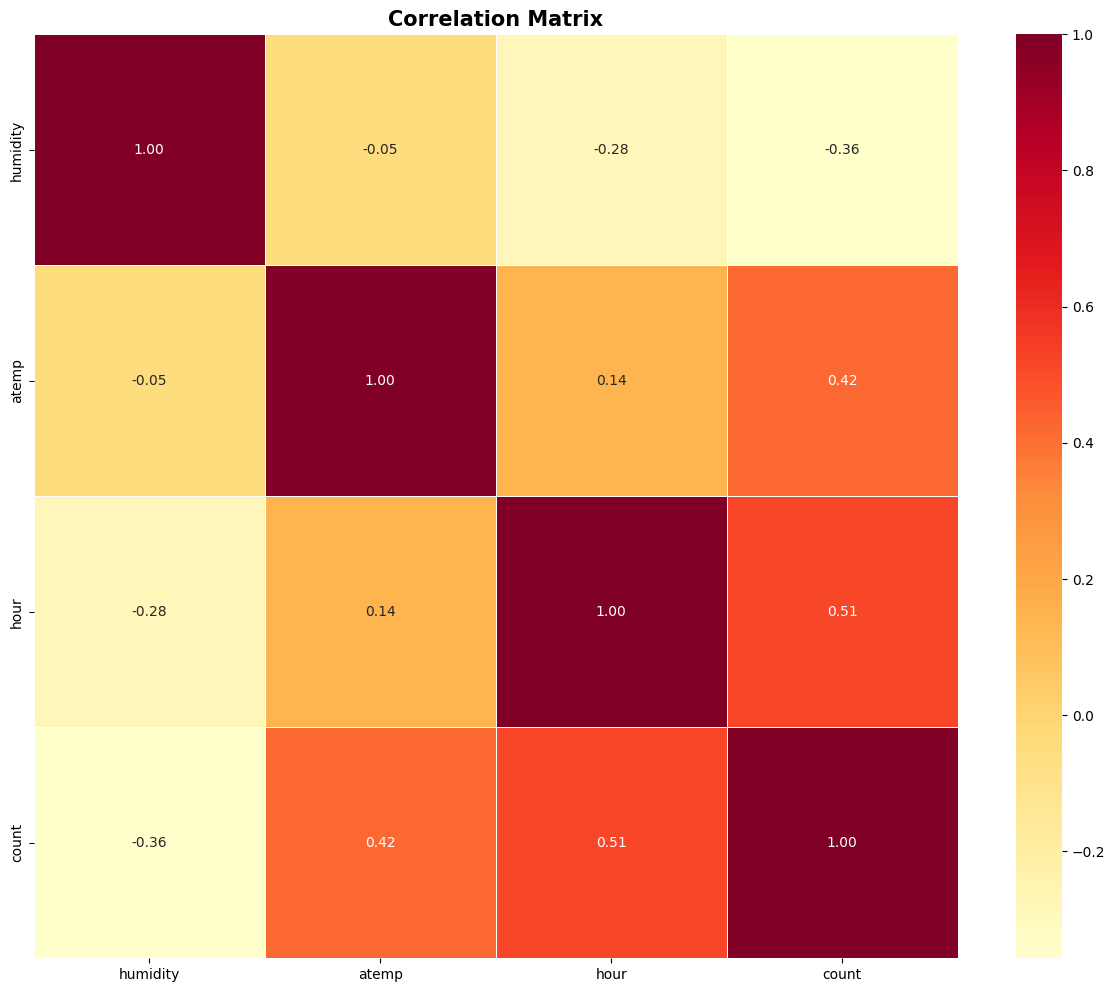

In [19]:
# Identify numeric columns, excluding specific non-numeric columns

numeric_columns = df_model.select_dtypes(include=[np.number, 'datetime64']).columns

# Create correlation matrix

corr = df_model[numeric_columns].corr(method='spearman')

# Plot the heatmap

plt.figure(figsize=(15, 12))
ylorrd_palette = sns.color_palette("YlOrRd", as_cmap=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap=ylorrd_palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

In [20]:
calc_vif(df_model[['humidity', 'atemp', 'hour', 'count']])

,variables,VIF
0,humidity,5.571588
1,atemp,8.360153
2,hour,3.837270
3,count,3.063059


Setelah kolom `temp` di drop, terlihat dari skor VIF terjadinya penurunan yang sangat signifikan untuk kolom `atemp` menjadi sebesar 8.3. Walaupun skor VIF untuk kolom `humidity` dan `atemp` masih bernilai di atas 4, namun kita akan tetap menggunakan kedua feature karena keduanya memiliki pengaruh yang signifikan untuk menentukan jumlah unit sepeda yang perlu tersedia berdasarkan situasi dan kondisi.

### **Checking Outliers**

Banyaknya outliers pada data akan mempengaruhi hasil analisis dan *modelling* yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

In [21]:
# Mengecek informasi statistik deskriptif data numerik

df_model.describe().select_dtypes(['float','int'])

,humidity,atemp,hour,count
count,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,0.476996,11.519770,189.271023
std,0.192102,0.171857,6.931872,181.223903
min,0.000000,0.000000,0.000000,1.000000
25%,0.470000,0.333300,6.000000,40.000000
50%,0.620000,0.484800,12.000000,142.000000
75%,0.780000,0.621200,18.000000,282.000000
max,1.000000,1.000000,23.000000,970.000000


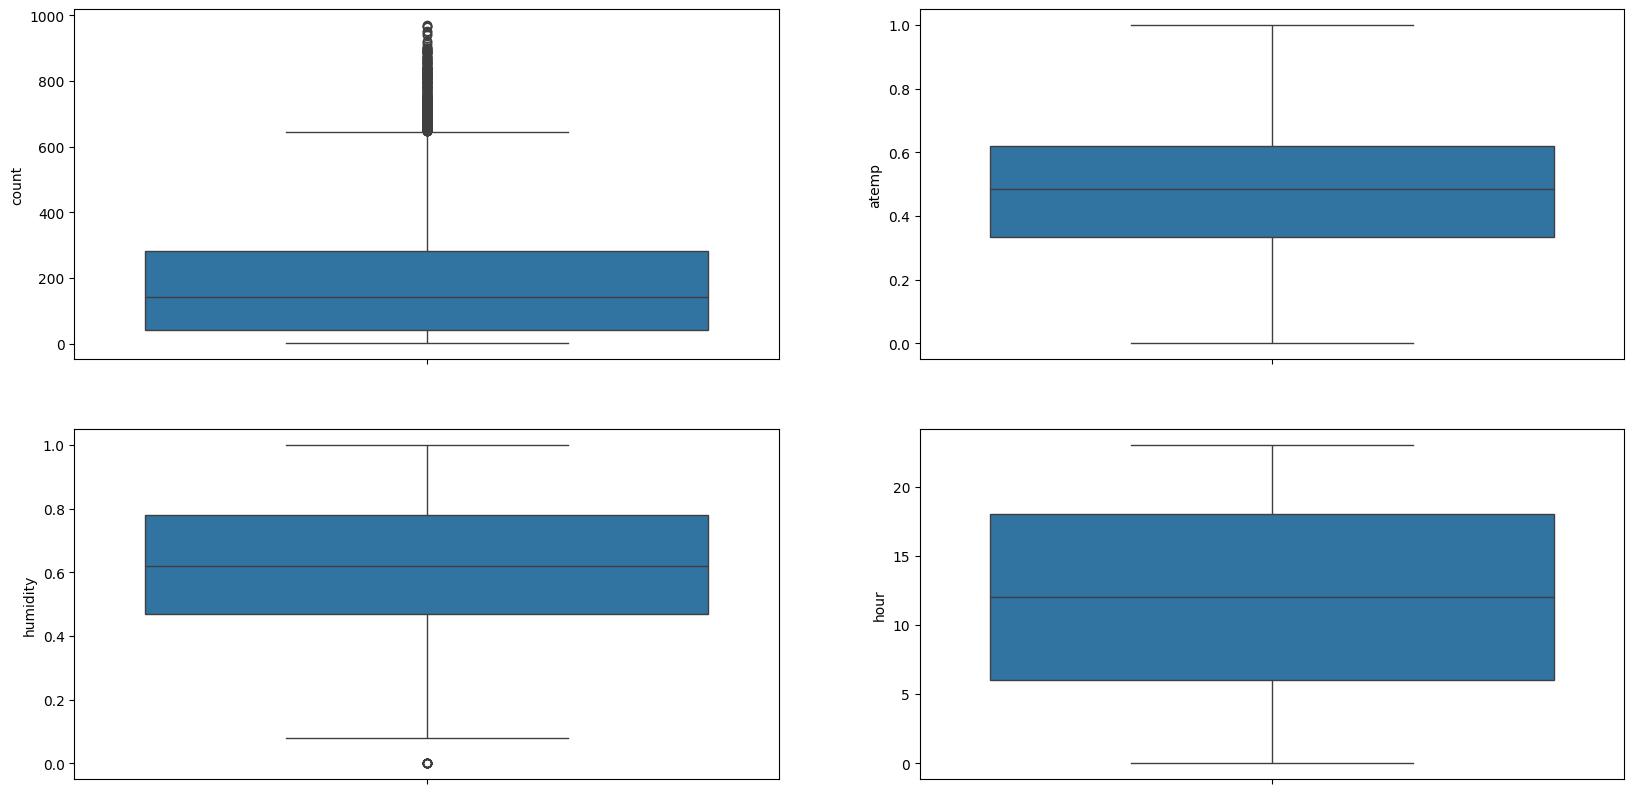

In [22]:
# Plot boxplot untuk mengecek outliers

fig, axes = plt.subplots(2,2, figsize=(20,10))
sns.boxplot(df_model['count'], ax=axes[0][0])
sns.boxplot(df_model['atemp'], ax=axes[0][1])
sns.boxplot(df_model['humidity'], ax=axes[1][0])
sns.boxplot(df_model['hour'], ax=axes[1][1])
plt.show()


Dari grafik boxplot di atas, terlihat cukup banyak outliers pada feature `count` dan ada sedikit pada feature `humidity`. Oleh karena itu kita akan menelisik lebih jauh terhadap data outliers tersebut. Untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada feature tersebut dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge.

### **Humidity**

In [23]:
df_model[df_model['humidity']==0]

,humidity,weather,holiday,season,atemp,hour,count,year,month,day
1094,0.0,Light snow/Light rain,0,winter,0.3182,0,3,2011,3,Thursday
1095,0.0,Light snow/Light rain,0,winter,0.3182,1,2,2011,3,Thursday
1096,0.0,Light snow/Light rain,0,winter,0.3333,6,12,2011,3,Thursday
1097,0.0,Light snow/Light rain,0,winter,0.3939,7,37,2011,3,Thursday
1098,0.0,Light snow/Light rain,0,winter,0.3939,8,44,2011,3,Thursday
1099,0.0,Light snow/Light rain,0,winter,0.4091,9,24,2011,3,Thursday
1100,0.0,Light snow/Light rain,0,winter,0.4091,11,11,2011,3,Thursday
1101,0.0,Light snow/Light rain,0,winter,0.4242,12,34,2011,3,Thursday
1102,0.0,Light snow/Light rain,0,winter,0.4242,13,12,2011,3,Thursday
1103,0.0,Light snow/Light rain,0,winter,0.4394,15,14,2011,3,Thursday


Dari informasi di atas diketahui terdapat 14 baris data yang memiliki nilai humidity 0. Namun berdasarkan informasi yang dilansir oleh [WGNTV](https://wgntv.com/weather/can-the-relative-humidity-ever-be-zero-percent/#:~:text=The%20concept%20of%20zero%20percent,if%20only%20in%20trace%20amounts), diketahui bahwa merupakan hal yang tidak mungkin jika nilai humidity adalah 0. Oleh karena itu kita akan drop data humidity yang bernilai 0.

In [24]:
# Drop feature 'humidity' yang memiliki nilai 0
df_model = df_model[df_model['humidity']!=0]

### **Count**

In [25]:
# Mengecek outliers pada feature 'count'

q1 = df_model['count'].quantile(0.25)
q3 = df_model['count'].quantile(0.75)
iqr = q3 - q1
limit = iqr*1.5
print(f'IQR: {iqr}')

limit_bawah = q1 - limit
limit_atas = q3 + limit
print(f'limit_bawah: {limit_bawah}')
print(f'limit_atas: {limit_atas}')        

IQR: 242.0
limit_bawah: -323.0
limit_atas: 645.0


In [26]:
# Cek deskriptif statistik kolom count
df_model['count'].describe()

count    12151.000000
mean       189.457329
std        181.242898
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: count, dtype: float64

In [27]:
# Cek count > 645
df_model[df_model['count']>645]

,humidity,weather,holiday,season,atemp,hour,count,year,month,day
3942,0.30,clear,0,summer,0.6515,14,651,2011,8,Tuesday
7292,0.43,cloudy,0,winter,0.6212,18,712,2012,3,Monday
7309,0.37,clear,0,winter,0.6364,17,676,2012,3,Tuesday
7310,0.34,clear,0,winter,0.6364,18,734,2012,3,Tuesday
7325,0.28,clear,0,winter,0.6364,17,782,2012,3,Wednesday
...,...,...,...,...,...,...,...,...,...,...
11748,0.51,clear,0,fall,0.2121,8,659,2012,12,Thursday
11818,0.61,cloudy,0,fall,0.3030,8,724,2012,12,Tuesday
11832,0.65,cloudy,0,fall,0.2576,8,688,2012,12,Wednesday
11853,0.60,clear,0,fall,0.2273,8,679,2012,12,Thursday


Dari informasi di atas diketahui bahwa 75% data pada kolom `count` memiliki jumlah kurang dari 282, sedangkan jumlah maksimalnya adalah 970. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 338 data yang jumlah `count` nya lebih besar dari 645 (batas atas berdasarkan metode IQR). Data outliers tersebut akan tetap kita gunakan untuk prediksi nantinya, oleh karena itu tidak akan kita drop.

Catatan: telah dilakukan percobaan prediksi dengan menggunakan dataset yang tidak memiliki outliers pada kolom `count`, namun hasil prediksi tersebut lebih buruk dibandingkan ketika data outliers tersebut dipertahankan.

### **Clean Dataset**

In [28]:
df_model.head()

,humidity,weather,holiday,season,atemp,hour,count,year,month,day
0,0.81,clear,0,winter,0.2879,0,16,2011,1,Saturday
1,0.80,clear,0,winter,0.2727,1,40,2011,1,Saturday
2,0.80,clear,0,winter,0.2727,2,32,2011,1,Saturday
3,0.75,clear,0,winter,0.2879,3,13,2011,1,Saturday
4,0.75,clear,0,winter,0.2879,4,1,2011,1,Saturday


In [29]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   humidity  12151 non-null  float64 
 1   weather   12151 non-null  object  
 2   holiday   12151 non-null  category
 3   season    12151 non-null  object  
 4   atemp     12151 non-null  float64 
 5   hour      12151 non-null  int64   
 6   count     12151 non-null  int64   
 7   year      12151 non-null  category
 8   month     12151 non-null  category
 9   day       12151 non-null  object  
dtypes: category(3), float64(2), int64(2), object(3)
memory usage: 795.5+ KB


Setelah melalui tahap preprocessing, tersisa 12.151 baris data yang akan digunakan untuk pemodelan. Terdapat 14 baris data yang sudah tereliminasi sesuai dengan asumsi dan argumen yang disampaikan di proses-proses sebelumnya.

## **Modelling**

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [31]:
df_model.head()

,humidity,weather,holiday,season,atemp,hour,count,year,month,day
0,0.81,clear,0,winter,0.2879,0,16,2011,1,Saturday
1,0.80,clear,0,winter,0.2727,1,40,2011,1,Saturday
2,0.80,clear,0,winter,0.2727,2,32,2011,1,Saturday
3,0.75,clear,0,winter,0.2879,3,13,2011,1,Saturday
4,0.75,clear,0,winter,0.2879,4,1,2011,1,Saturday


### **Encoding**

Agar kita dapat menggunakan semua feature yang dipilih, maka feature-feature kategorikal perlu diubah menjadi feature numerikal. Kita dapat menggunakan `ColumnTransformer` untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [32]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['weather', 'season', 'year']),
    ('Binary', ce.BinaryEncoder(), ['day'])
], remainder='passthrough')

### **Data Splitting (Feature dan Target)**

In [33]:
# Memisahkan data independen variabel dengan target

feature = df_model.drop(['count'], axis=1)
target = df_model['count']

### **Train and Test Splitting**

In [34]:
# Splitting data training dan test dengan proporsi 70:30

X_train, X_test, y_train, y_test= train_test_split(
    feature,
    target,  
    test_size=0.3,
    random_state=12
)

### **Choosing Benchmark Model**

In [35]:
# Menentukan algoritma yang akan digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=12)
rf = RandomForestRegressor(random_state=12)
gb = GradientBoostingRegressor(random_state=12)
xgb = XGBRegressor(random_state=12)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Algoritma Candidates
models = [log_lr, log_knn, log_dt, log_rf, log_gb, log_xgb]

score_mae = []
score_mape = []
score_r2 = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for model in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=8)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, model)

    score_mae.append(model_cv_mae.mean())
    
    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, model)

    score_mape.append(model_cv_mape.mean())

    # R2
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise'
        )
    
    print(model_cv_r2, model)

    score_r2.append(model_cv_r2.mean())

[-109.19170571 -103.22446917 -106.18723997 -111.2227942  -101.84013196] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.41703554 -1.35092297 -1.46627793 -1.36283377 -1.34927939] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.14418844 0.14228845 0.25197674 0.1619133  0.24337523] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-46.44001929 -43.29364482 -46.59258785 -48.15407622 -46.02717575] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.45478407 -0.44170317 -0.43692533 -0.43928968 -0.49762417] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[0.82927201 0.

In [36]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'Gradient Boosting', 'XGBoost Regressor'],
    'MAE': score_mae,
    'MAPE': score_mape,
    'R-squared': score_r2
})

,Model,MAE,MAPE,R-squared
0,Linear Regression,-106.333268,-1.389270,0.188748
1,KNN Regressor,-46.101501,-0.454065,0.825074
2,DecisionTree Regressor,-45.672462,-0.512351,0.797346
3,RandomForest Regressor,-35.523658,-0.349627,0.889846
4,Gradient Boosting,-55.468159,-0.487001,0.756239
5,XGBoost Regressor,-29.892448,-0.278250,0.924020


Dari hasil di atas, diketahui bahwa model XGBoost menjadi model yang terbaik karena memiliki performa nilai MAE (29.91), MAPE (0.27), dan R-squared (0.92) yang lebih baik dibandingkan model lainnya. Berikutnya kita akan melakukan prediksi pada Test Set dengan menggunakan benchmark model yaitu XGBoost. 

### **Extreme Gradient Boosting (XGBoost)**

Extreme Gradient Boosting (XGBoost) merupakan salah satu model yang termasuk ke dalam *similar type ensemble method*. Di dalam algoritma ini, *Decision Trees* dibuat dalam bentuk yang sekuensial, dimana bobot memiliki peran yang penting dalam XGBoost. Bobot diterapkan kepada semua variabel independen yang nantinya akan dimasukkan ke dalam *Decision Trees* untuk memprediksi hasil. Bobot dari variabel yang diprediksi salah akan ditambahkan dan variabel ini akan dimasukkan ke dalam *Decision Tree* yang berikutnya [(link sumber)](https://www.geeksforgeeks.org/xgboost/). Model ini termasuk ke dalam *non-interpretable* model dikarenakan kita tidak dapat mengetahui variabel mana yang salah diprediksi. XGBoost memiliki kinerja yang baik karena termasuk model yang robust untuk berbagai jenis data.

### **Predict to Test Set with the Benchmark Model**

Melakukan prediksi pada Test Set menggunakan model XGBoost

In [37]:
xgb = TransformedTargetRegressor(XGBRegressor(random_state=12), func=np.log, inverse_func=np.exp)

score_mae = []
score_mape = []
score_r2 = []

estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
score_mae.append(mean_absolute_error(y_test, y_pred))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
score_r2.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape, 'R-squared': score_r2}, index=['XGB'])
score_before_tuning

,MAE,MAPE,R-squared
XGB,29.336247,0.264218,0.933176


Terlihat bahwa ketika melakukan prediksi pada Test Set, XGBoost tetap memiliki performa yang baik. Dimana nilai MAE dan MAPE menurun, sedangkan nilai R2 mengalami peningkatan.

### **Hyperparameter Tuning (GridSearch**)

Selanjutnya kita akan melakukan Hyperparameter Tuning pada model XGBoost dengan harapan hasil yang nantinya didapatkan menjadi lebih baik. Pada tahap hyperparameter tuning ini kita akan menggunakan `GridSearch` untuk mencoba seluruh kombinasi hyperparameter. Parameter yang akan digunakan akan dibatasi berupa **max_depth** (kedalaman pohon), **learning_rate** (ukuran step pada tiap iterasi), dan **n_estimators** (jumlah pohon). Hal ini dilakukan guna mencegah terjadinya overfitting yang bisa disebabkan jika model terlalu kompleks dan juga untuk menjaga efisiensi kinerja dari device (laptop) yang digunakan.

In [38]:
# Kedalaman pohon
max_depth = [2,3,4,5,6,7,8,9]

# Learning rate
learning_rate = [0.1, 0.001, 0.0001, 0.2, 0.3, 0.5, 0,7]

# Jumlah pohon
n_estimators = list(np.arange(200, 301, 20))

hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators
}

xgb = XGBRegressor(random_state=12, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=12)
 
# Hyperparameter tuning(GridSearchCV)
gridsearch_xgb = GridSearchCV(
    estimator_xgb, 
    param_grid = hyperparam_space_xgb,
    cv = crossval, 
    scoring = 'neg_mean_absolute_error',
    n_jobs = -1,
)

In [39]:
# Fitting data training untuk mencari parameter terbaik
gridsearch_xgb.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['weather',
                                                                          'season',
                                                                          'year']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['day'])])),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylev...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=12, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.1, 0.001, 0.0001, 0.2, 0.3,
                                                  0.5, 0, 7],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'model__n_estimators': [200, 220, 240, 260, 280, 300]},
             scoring='neg_mean_absolute_error')

In [40]:
print('XGBoost')
print('Best_score:', gridsearch_xgb.best_score_)
print('Best_params:', gridsearch_xgb.best_params_)

XGBoost
Best_score: -29.61228092105042
Best_params: {'model__learning_rate': 0.1, 'model__max_depth': 8, 'model__n_estimators': 300}


In [41]:
model = { 'XGB' : TransformedTargetRegressor(gridsearch_xgb.best_estimator_, func=np.log, inverse_func=np.exp)
}

xgb_tuning = TransformedTargetRegressor(gridsearch_xgb.best_estimator_, func=np.log, inverse_func=np.exp)

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'R-squared': r2_xgb_tuning}, index=model.keys())
score_after_tuning

,MAE,MAPE,R-squared
XGB,27.368867,0.261027,0.94112


### **Performance Comparison**

Berikut adalah komparasi performa model XGBoost sebelum dan sesudah dilakukan Hyperparameter Tuning

In [42]:
score_before_tuning

,MAE,MAPE,R-squared
XGB,29.336247,0.264218,0.933176


In [43]:
score_after_tuning

,MAE,MAPE,R-squared
XGB,27.368867,0.261027,0.94112


Terlihat bahwa model mengalami peningkatan performa, dimana nilai MAE dan MAPE menurun serta nilai R2 yang meningkat walaupun tidak signifikan.
- MAE, MAPE, dan R2 sebelum tuning: 28.69, 0.26, dan 0.93
- MAE, MAPE, dan R2 setelah tuning: 26.23, 0.25, dan 0.94

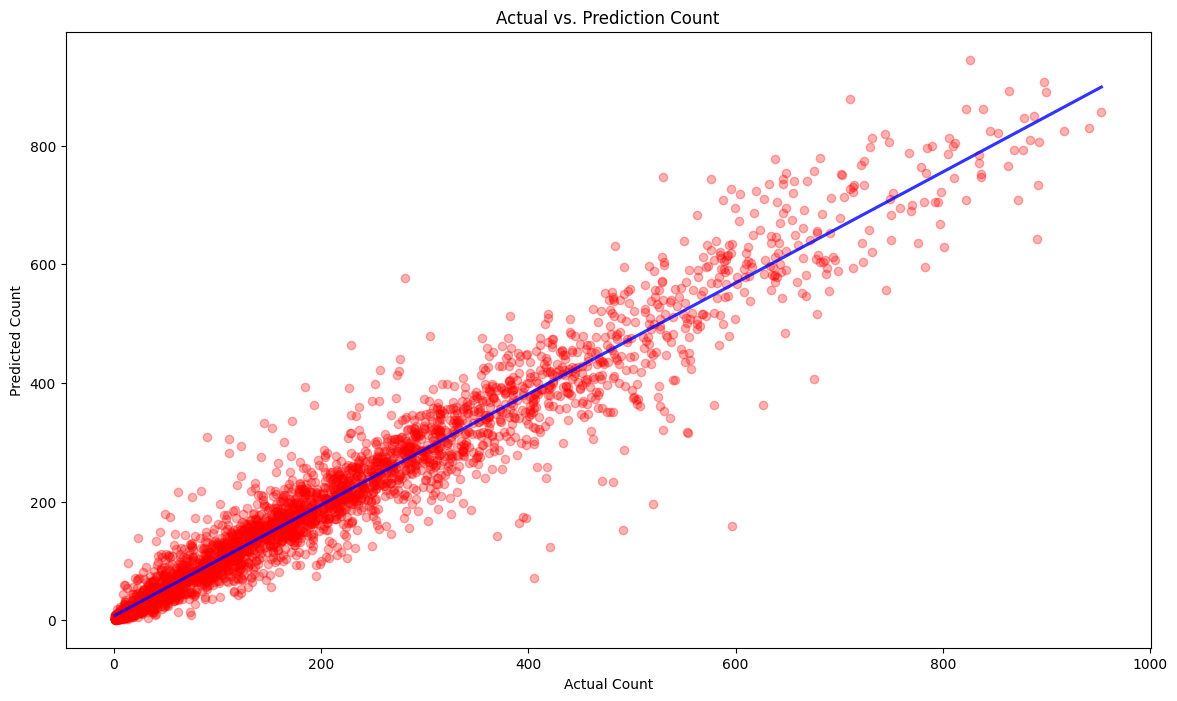

In [44]:
plt.figure(figsize=(14, 8))
sns.regplot(x=y_test, y=y_pred_xgb_tuning, ci=None, 
            scatter_kws={'color': 'red', 'alpha': 0.3}, 
            line_kws={'color': 'blue', 'alpha': 0.8}).set(
                title='Actual vs. Prediction Count', 
                xlabel='Actual Count', 
                ylabel='Predicted Count'
            )
plt.show()

Dari grafik regplot di atas terlihat bahwa model masih mampu melakukan predikisi dengan cukup baik hingga mencapai nilai jumlah sepeda di kisaran 600 unit. Namun kita akan mencoba mengecek lebih jauh hasil metrik MAE dan MAPE dengan mengelompokkan Target (count) pada data Test dalam range tertentu.

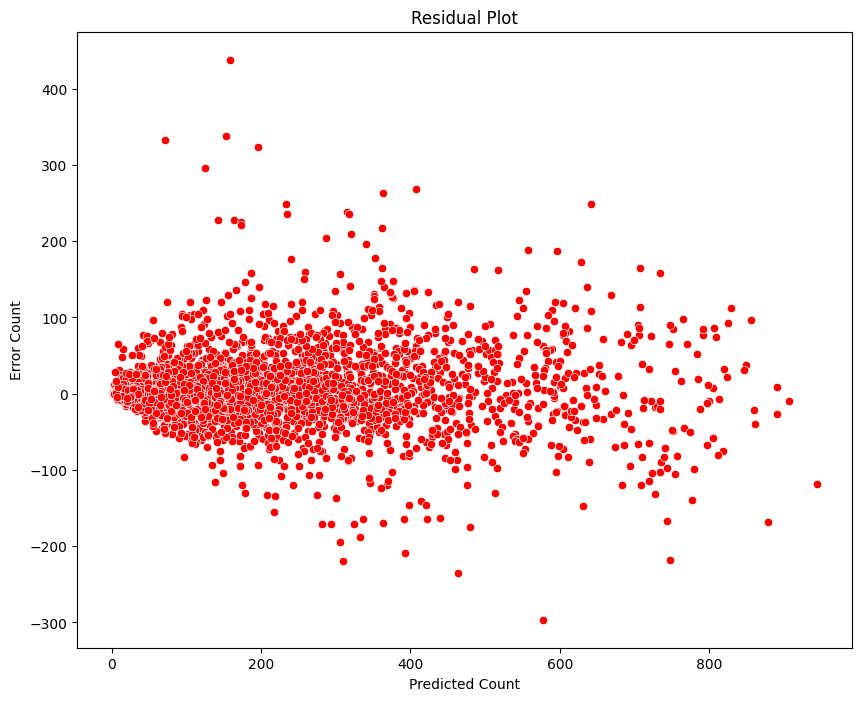

In [45]:
residual = y_test - y_pred_xgb_tuning

plot_color = 'red'

plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_pred_xgb_tuning, y=residual, color=plot_color).set(
    title='Residual Plot', xlabel='Predicted Count', ylabel='Error Count'
)
plt.show()

In [46]:
dftarget = pd.DataFrame({'Actual Count': y_test, 'Predicted Count': y_pred_xgb_tuning})

df50 = dftarget[dftarget['Actual Count'] <=50]
df100 = dftarget[(dftarget['Actual Count']>50) & (dftarget['Actual Count']<=100)]
df150 = dftarget[(dftarget['Actual Count']>100) & (dftarget['Actual Count']<=150)]
df200 = dftarget[(dftarget['Actual Count']>150) & (dftarget['Actual Count']<=200)]
df250 = dftarget[(dftarget['Actual Count']>200) & (dftarget['Actual Count']<=250)]
df300 = dftarget[(dftarget['Actual Count']>250) & (dftarget['Actual Count']<=300)]
df350 = dftarget[(dftarget['Actual Count']>300) & (dftarget['Actual Count']<=350)]
df400 = dftarget[(dftarget['Actual Count']>350) & (dftarget['Actual Count']<=400)]
df450 = dftarget[(dftarget['Actual Count']>400) & (dftarget['Actual Count']<=450)]
df500 = dftarget[(dftarget['Actual Count']>450) & (dftarget['Actual Count']<=500)]
df550 = dftarget[(dftarget['Actual Count']>500) & (dftarget['Actual Count']<=550)]
df600 = dftarget[(dftarget['Actual Count']>550) & (dftarget['Actual Count']<=600)]
df600plus = dftarget[dftarget['Actual Count']>600]

target_range = [df50, df100, df150, df200, df250, df300, df350, df400, df450, df500, df550, df600, df600plus, dftarget]
index_range = ['<=50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501-550', '551-600', '>600', 'All Count Range (Max 953)']
mae = []
mape = []
for target in target_range:
    scoremae = mean_absolute_error(target['Actual Count'], target['Predicted Count'])
    scoremape = mean_absolute_percentage_error(target['Actual Count'], target['Predicted Count'])
    mae.append(scoremae)
    mape.append(scoremape)

range_metrics = pd.DataFrame({
              "Score MAE": mae,
              "Score MAPE": mape}, index=index_range)
range_metrics

,Score MAE,Score MAPE
<=50,7.513073,0.524178
51-100,18.938699,0.259726
101-150,23.881441,0.193955
151-200,27.322196,0.158009
201-250,30.322460,0.135405
251-300,32.654808,0.119168
301-350,40.235885,0.124885
351-400,46.027534,0.122921
401-450,46.142540,0.109860
451-500,62.754173,0.132190


Berdasarkan hasil pengelompokkan target tersebut terlihat bahwa untuk target dengan jumlah unit sepeda yang disewa sampai dengan 50 memiliki nilai MAPE yang cukup besar (~50%), walaupun pembagian data training dan testing untuk range tersebut sudah cukup baik, training (2418) dan testing (1008). Dari hasil pengelompokkan tersebut, bisa dilihat limitasi model dapat memprediksi dengan baik untuk jumlah unit sepeda di atas 50 unit, dengan hasil nilai evaluasi metrik yang masih cukup baik dan reasonable.

### **Feature Importances**

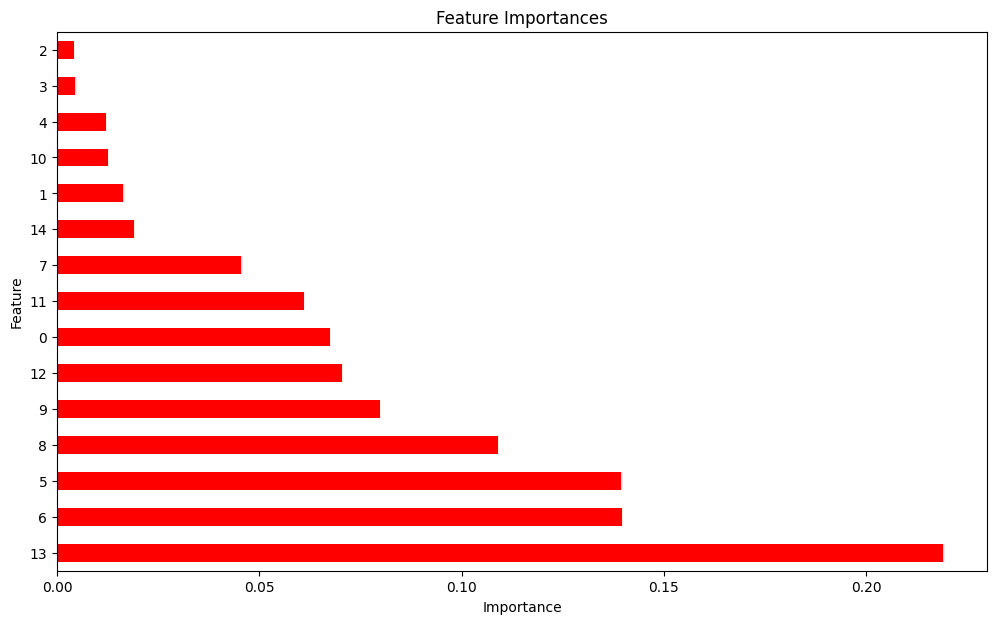

In [47]:
xgb_tuning = gridsearch_xgb.best_estimator_

# Extract feature importances from the XGBoost model
feature_importances = xgb_tuning['model'].feature_importances_

# Create a DataFrame with feature names and importances
feature_imp = pd.Series(feature_importances, name='Importance')

# Sort the Series by importance in descending order
feature_imp = feature_imp.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 7))
feature_imp.plot(kind='barh', title='Feature Importances', color='red')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## **Conclusion**

Diketahui hasil dari hyperparameter tuning bahwa parameter terbaik yang dapat digunakan dengan benchmark model XGBoost ialah:
- max_depth = 8
- learning_rate = 0.1
- n_estimators = 260

Berdasarkan dari pemodelan yang sudah dilakukan, feature `hour`, `year`, dan `season` menjadi feature yang paling berpengaruh terhadap `count`

Metrik evaluasi yang digunakan pada model ini adalah nilai MAE, MAPE, dan R2. Jika dilihat dari nilai MAPE yang dihasilkan oleh model setelah hyperparameter tuning (~25%), dapat disimpulkan bahwa bila nanti model yang dibuat ini digunakan untuk memperkirakan jumlah unit sepeda yang harus disediakan pada rentang nilai yang sudah dilatih terhadap model (maksimal jumlah unit sepeda 970), maka perkiraan jumlahnya rata-rata akan meleset kurang lebih sebesar 25% dari jumlah yang seharusnya.

Namun dilihat dari hasil pengelompokkan berdasarkan rentang target dan visualisasi residual, bisa dilihat limitasi model dapat memprediksi dengan baik untuk jumlah unit sepeda di atas 50 unit, dengan hasil nilai evaluasi metrik yang masih cukup baik dan reasonable. Tidak menutup kemungkinan bahwa prediksi yang dihasilkan bisa meleset lebih jauh. 

Bias tersebut dihasilkan karena terbatasnya feature pada dataset yang berkaitan dengan target (jumlah unit sepeda yang disewa) atau yang mampu merepresentasikan keadaan dimana calon pelanggan memutuskan untuk menggunakan jasa peminjaman sepeda seperti lokasi stasiun sepeda, jarak stasiun sepeda dengan perkantoran/sekolah/ruang publik, dll

## **Recommendation**

Berikut adalah hal-hal yang dapat dilakukan untuk mengembangkan agar model bisa menjadi lebih baik:

1. Adanya penambahan feature yang lebih berkorelasi terhadap target (`count`), seperti lokasi stasiun sepeda dan jarak stasiun sepeda dengan perkantoran/sekolah/ruang publik.

2. Adanya penambahan data, dataset yang digunakan hanya dalam rentang 1 tahun (2011-2012). Apabila ada penambahan rentang tahun data dalam dataset, hal itu tentu dapat membantu dalam meningkatkan prediksi dari model.

3. Model yang sudah dibuat ini dapat digunakan untuk mengembangkan pembuatan model yang lain. Seperti memprediksi total unit sepeda yang disewa pada lokasi tertentu. Dimana nantinya dapat dianalisa sebagai pertimbangan untuk menambah stasiun sepeda di lokasi-lokasi yang strategis.

### **Save Model**

In [48]:
# X = df_model.drop('count', axis=1)
# y = df_model['count']

In [49]:
# import pickle

# gridsearch_xgb.best_estimator_.fit(X, y)

# pickle.dump(gridsearch_xgb.best_estimator_, open('RizalBikeSharing.sav', 'wb'))

In [50]:
# filename = 'RizalBikeSharing.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [51]:
# print(mean_absolute_error(y_test, loaded_model.predict(X_test)))